In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample=pd.read_excel('sample.xlsx',header=0)
sample.shape[0]

1104

In [3]:
sample.columns=np.hstack(['payment','sum_payments','portfolio','score','divs',range(1,13)])
sample = sample.sort_values(by='score',ascending=False).reset_index(drop=True)

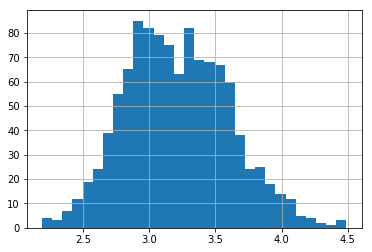

In [4]:
sample.score.hist(bins=30)

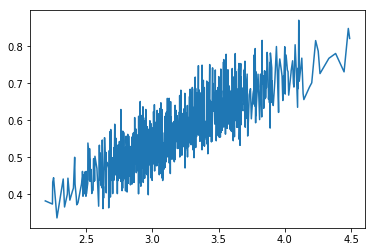

In [5]:
plt.plot(sample.score,sample.divs.values/sample.sum_payments.values)

In [6]:
print (sample[sample.payment>7000].score.mean())
print (sample.score.mean())
print (sample[sample.payment<3000].score.mean())

3.2169536870887363
3.2138387880053356
3.1922678137411813


In [7]:
array = sample.iloc[:,-12:].values.reshape(12*sample.shape[0],1)
array = pd.DataFrame(array, columns=['stocks'])
array['stocks'].value_counts()/(sample.shape[0])

LKOH     0.578804
MGNT     0.575181
VSMO     0.572464
AKRN     0.558877
SBER     0.558877
SNGSP    0.554348
RASP     0.552536
GMKN     0.548007
NLMK     0.546196
SVAV     0.544384
ROSN     0.543478
MAGN     0.540761
RTKM     0.539855
TATNP    0.538949
SNGS     0.537138
SBERP    0.536232
MTSS     0.535326
AFLT     0.534420
SIBN     0.533514
GAZP     0.531703
CHMF     0.527174
TATN     0.511775
Name: stocks, dtype: float64

In [8]:
good,bad = 0.80,0.20
print ('Граница худших {}%'.format(bad*100),np.quantile(sample.score,q=bad))
print ('Граница лучших {}%'.format(good*100),np.quantile(sample.score,q=good))
bad_border = np.quantile(sample.score,q=bad)
good_border = np.quantile(sample.score,q=good)

Граница худших 20.0% 2.868110258891674
Граница лучших 80.0% 3.553670711141552


## Смотрим лучших

In [9]:
good_sample = sample[sample.score>=good_border]
good_sample = good_sample.sort_values(by='score',ascending=False).reset_index(drop=True)

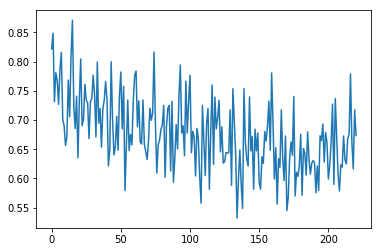

In [10]:
plt.plot(good_sample.divs.values/good_sample.sum_payments.values)

In [11]:
array = good_sample.iloc[:,-12:].values.reshape(12*good_sample.shape[0],1)
array = pd.DataFrame(array, columns=['stocks'])
array['stocks'].value_counts()/(sample.shape[0]*(1-good))

TATNP    0.855978
VSMO     0.715580
TATN     0.692935
SNGSP    0.670290
AKRN     0.670290
SBERP    0.652174
CHMF     0.652174
MAGN     0.629529
SBER     0.570652
LKOH     0.566123
MGNT     0.566123
AFLT     0.552536
GMKN     0.538949
NLMK     0.534420
SIBN     0.525362
ROSN     0.507246
RASP     0.480072
MTSS     0.457428
SVAV     0.362319
SNGS     0.312500
GAZP     0.262681
RTKM     0.235507
Name: stocks, dtype: float64

## Смотрим худших

In [12]:
bad_sample = sample[sample.score<=bad_border]
bad_sample = bad_sample.sort_values(by='score',ascending=True).reset_index(drop=True)

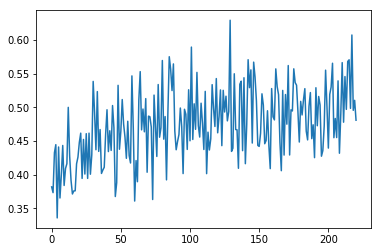

In [13]:
plt.plot(bad_sample.divs.values/bad_sample.sum_payments.values)

In [14]:
array = bad_sample.iloc[:,-12:].values.reshape(12*bad_sample.shape[0],1)
array = pd.DataFrame(array, columns=['stocks'])
array['stocks'].value_counts()/(sample.shape[0]*bad)

RTKM     0.788043
SNGS     0.774457
GAZP     0.742754
SVAV     0.733696
RASP     0.679348
MTSS     0.652174
MGNT     0.629529
LKOH     0.615942
SBER     0.611413
ROSN     0.566123
AFLT     0.538949
GMKN     0.525362
SIBN     0.516304
NLMK     0.498188
SNGSP    0.489130
SBERP    0.466486
VSMO     0.403080
MAGN     0.398551
CHMF     0.394022
AKRN     0.371377
TATN     0.353261
TATNP    0.262681
Name: stocks, dtype: float64